In [1]:
# подключим библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, plot, iplot
import plotly.graph_objs as go # графические объекты
from plotly.subplots import make_subplots

#Загружаем выборку wine.csv и разбиваем её на подмножества X,y
data_wine=pd.read_csv('data/wine.csv')

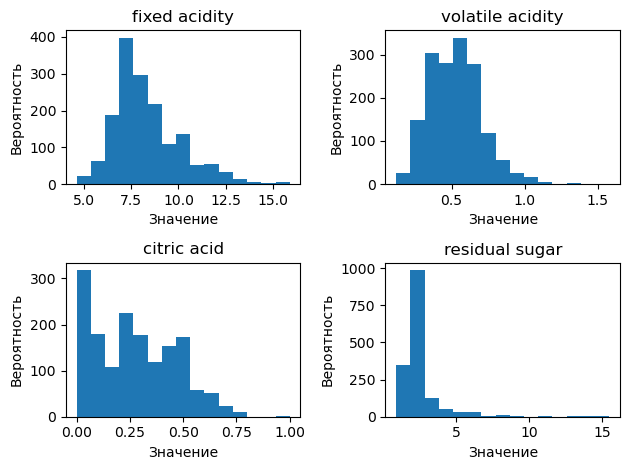

In [2]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(x=data_wine['fixed acidity'], bins=15)
axs[0, 0].set_title('fixed acidity')
axs[0, 1].hist(x=data_wine['volatile acidity'], bins=15)
axs[0, 1].set_title('volatile acidity')
axs[1, 0].hist(x=data_wine['citric acid'], bins=15)
axs[1, 0].set_title('citric acid')
axs[1, 1].hist(x=data_wine['residual sugar'], bins=15)
axs[1, 1].set_title('residual sugar')

for ax in axs.flat:
    ax.set(xlabel='Значение', ylabel='Вероятность')

fig.tight_layout()

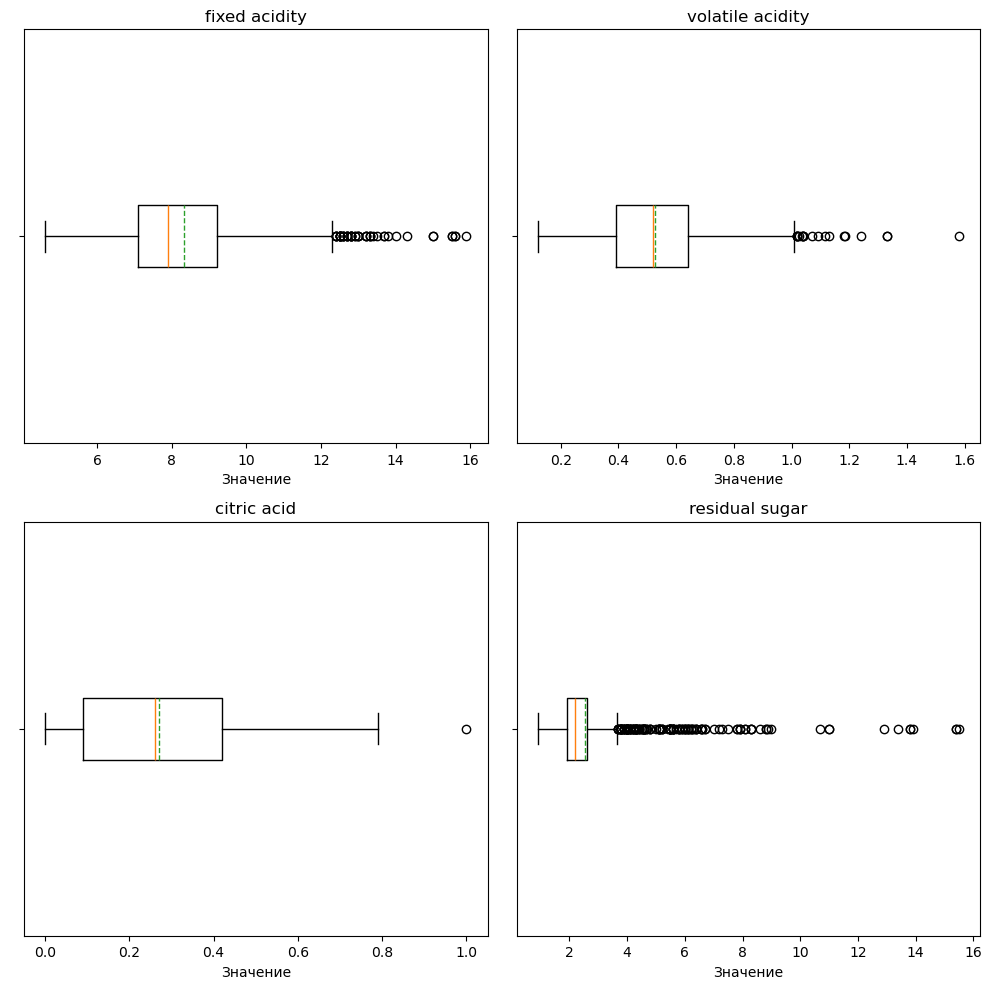

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].boxplot(x=data_wine['fixed acidity'], labels=(' '), vert=False, showmeans=True, meanline=True,)
axs[0, 0].set_title('fixed acidity')
axs[0, 1].boxplot(x=data_wine['volatile acidity'], labels=(' '), vert=False, showmeans=True, meanline=True,)
axs[0, 1].set_title('volatile acidity')
axs[1, 0].boxplot(x=data_wine['citric acid'], labels=(' '), vert=False, showmeans=True, meanline=True,)
axs[1, 0].set_title('citric acid')
axs[1, 1].boxplot(x=data_wine['residual sugar'], labels=(' '), vert=False, showmeans=True, meanline=True,)
axs[1, 1].set_title('residual sugar')

for ax in axs.flat:
    ax.set(xlabel='Значение', ylabel='')
    
fig.tight_layout()

  fixed acidity volatile acidity citric acid residual sugar chlorides  \
           mean             mean        mean           mean      mean   
0      0.960841         1.000000    0.792827       1.000000  1.000000   
1      1.000000         0.804316    1.000000       0.997598  0.888929   

  free sulfur dioxide total sulfur dioxide   density        pH sulphates  \
                 mean                 mean      mean      mean      mean   
0            1.000000             1.000000  1.000000  1.000000  0.893037   
1            0.921852             0.720138  0.999396  0.999695  1.000000   

    alcohol  
       mean  
0  0.914459  
1  1.000000  


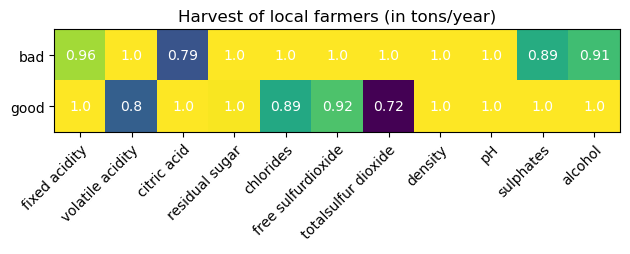

In [4]:
quality = ['bad', 'good']
parameters = ['fixed acidity','volatile acidity','citric acid','residual sugar',\
                  'chlorides','free sulfurdioxide',' totalsulfur dioxide','density',\
                  'pH','sulphates','alcohol']

def min_max_scaling(column):
    #return (column - column.min())/(column.max()-column.min())
    return (column)/(column.max()-0)

wines = data_wine\
    .groupby(by=['quality'],as_index=False)\
    .agg(['mean'])

del wines['quality']
for col in wines.columns:
    wines[col]=min_max_scaling(wines[col])
print(wines)

fig, ax = plt.subplots()
im = ax.imshow(wines)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(parameters)), labels=parameters)
ax.set_yticks(np.arange(len(quality)), labels=quality)

#Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(quality)):
    for j in range(len(parameters)):
        text = ax.text(j, i, round(wines.iloc[i,j],2),
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

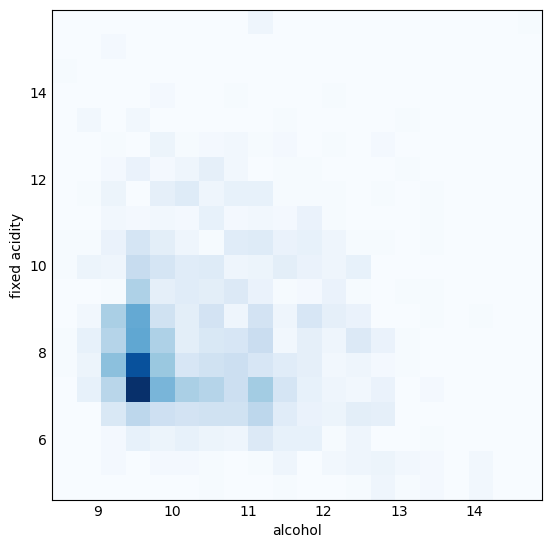

In [5]:
plt.style.use('_mpl-gallery-nogrid')

# make data: correlated + noise
np.random.seed(1)
x = data_wine['alcohol']
y = data_wine['fixed acidity']

# plot:
fig, ax = plt.subplots(figsize=(5,5))

ax.hist2d(x, y, bins=(20,20))
ax.set(xlabel='alcohol', ylabel='fixed acidity')

plt.show()